In [1]:
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import os
import pickle
import random 
import operator
import math
import numpy as np
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import IPython
from python_speech_features import mfcc

# Data Visualization

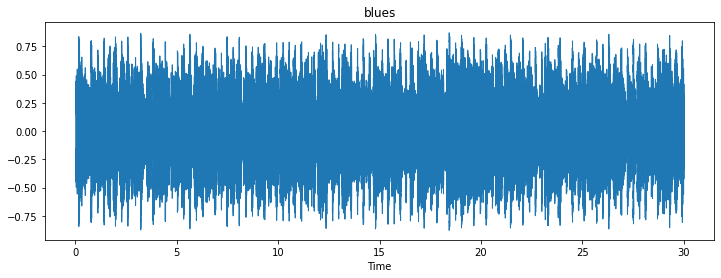

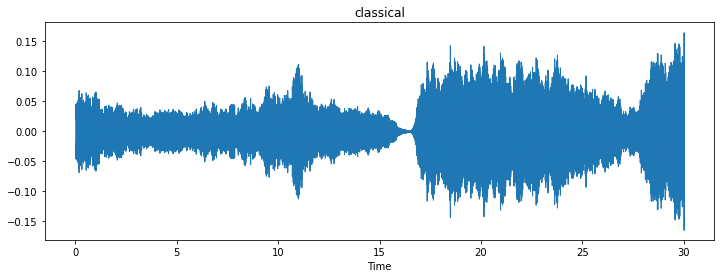

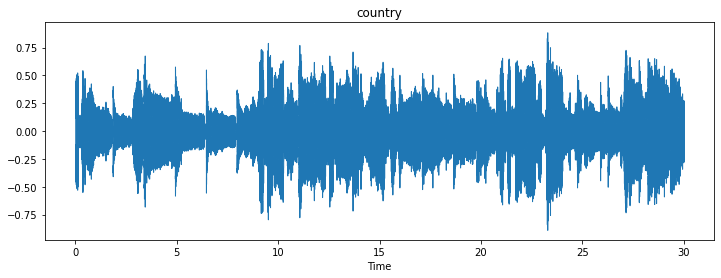

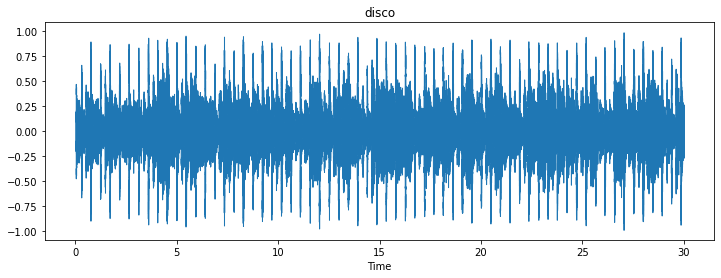

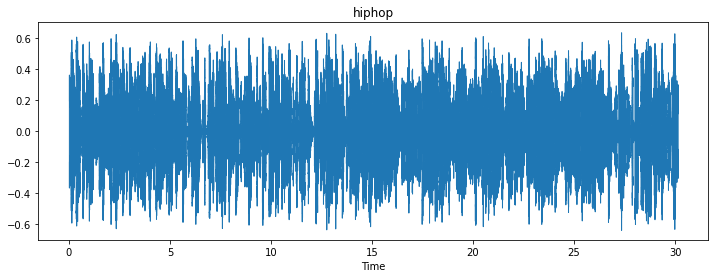

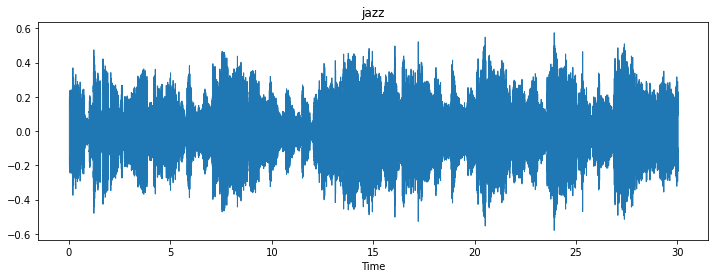

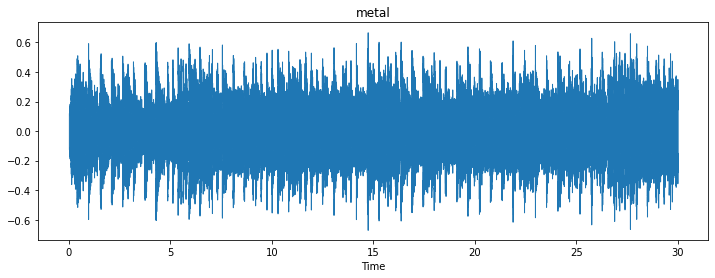

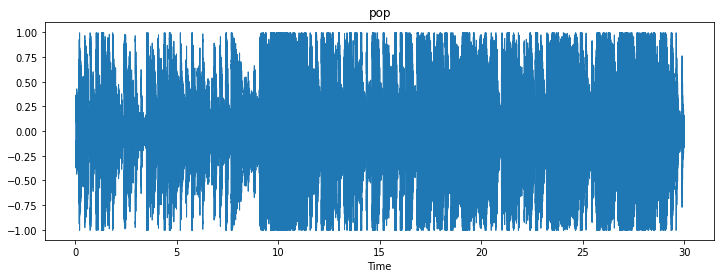

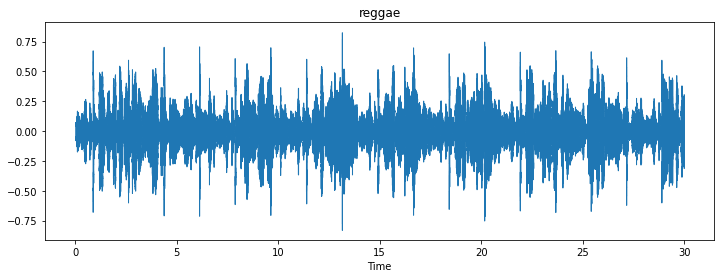

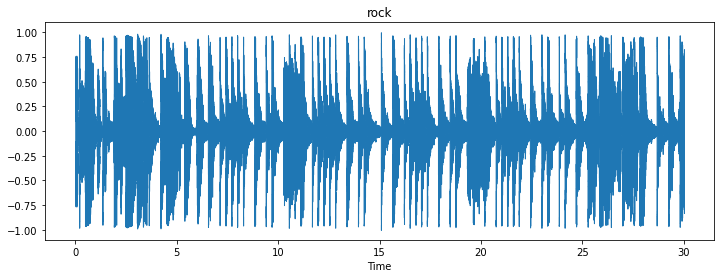

In [2]:

directory = "genres/"
i = 0
for folder in os.listdir(directory):
    temp = random.randint(0,100)
    audio_sample = directory + folder + "/" + random.choice(os.listdir(directory+folder))
    data, sr = librosa.load(audio_sample)
    IPython.display.Audio(data, rate=sr)
    plt.figure(figsize=(12,4))
    plt.title(folder)
    librosa.display.waveshow(data, sr = sr)
    plt.show()
    

# K-nearest Neighbour

In [3]:
def getNeighbors(trainingSet, instance, k):
    distances = []
    for x in range (len(trainingSet)):
        dist = distance(trainingSet[x], instance, k )+ distance(instance, trainingSet[x], k)
        distances.append((trainingSet[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [4]:
def nearestClass(neighbors):
    classVote = {}
    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response]+=1 
        else:
            classVote[response]=1
    sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse=True)
    return sorter[0][0]

In [5]:
def distance(instance1 , instance2 , k ):
    distance =0 
    mm1 = instance1[0] 
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1)) 
    distance+=(np.dot(np.dot((mm2-mm1).transpose() , np.linalg.inv(cm2)) , mm2-mm1 )) 
    distance+= np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance-= k
    return distance

In [6]:
def getAccuracy(testSet, predictions):
    correct = 0 
    for x in range (len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct+=1
    return 1.0*correct/len(testSet)

In [7]:
dataset = []
def loadDataset(filename , split , trSet , teSet):
    with open("my.dat" , 'rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break  
    for x in range(len(dataset)):
        if random.random() <split :      
            trSet.append(dataset[x])
        else:
            teSet.append(dataset[x])  
trainingSet = []
testSet = []
loadDataset("my.dat" , 0.66, trainingSet, testSet)

In [8]:
directory = "genres/"
f= open("my.dat" ,'wb')
i=0
for folder in os.listdir(directory):
    i+=1
    if i==11 :
        break   
    for file in os.listdir(directory+folder):  
        (rate,sig) = wav.read(directory+folder+"/"+file)
        mfcc_feat = mfcc(sig,rate ,winlen=0.020, appendEnergy = False)
        covariance = np.cov(np.matrix.transpose(mfcc_feat))
        mean_matrix = mfcc_feat.mean(0)
        feature = (mean_matrix , covariance , i)
        pickle.dump(feature , f)
f.close()

In [9]:
leng = len(testSet)
predictions = []
for x in range (leng):
    predictions.append(nearestClass(getNeighbors(trainingSet ,testSet[x] , 5))) 
accuracy1 = getAccuracy(testSet , predictions)
print(accuracy1)

0.7191011235955056
